In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Average_salary,Job_State,Company_age,Python_yn,AI_yn,ML_yn,Statistic_yn,Simplified_title,Seniority,desc_len
0,Data Scientist,$64K - $106K (Glassdoor est.),"Secure our Nation, Ignite your Future\nOvervie...",4.2,ManTech International Corporation,"Alexandria, VA",5001 to 10000 Employees,1968,Company - Public,Research & Development,...,85.0,VA,53,0,1,0,0,data scientist,not_specified,947
1,Sr. Data Scientist,$83K - $138K (Glassdoor est.),Sr. Data Scientist -INF0001YE\nDescription\n\n...,3.6,CNA Insurance,"Chicago, IL",1001 to 5000 Employees,1897,Company - Public,Insurance Carriers,...,110.5,IL,124,0,0,0,0,data scientist,senior,522
2,R&D Scientist,$38K - $68K (Glassdoor est.),"LGC, Biosearch Technologies is seeking a detai...",3.5,LGC Limited,"Middleton, WI",1001 to 5000 Employees,1842,Company - Private,Biotech & Pharmaceuticals,...,53.0,WI,179,0,1,0,0,not_specified,not_specified,635
3,Data Scientist,$71K - $119K (Glassdoor est.),Who Are We?\nQinetiQ Inc. is a leading innovat...,2.5,QinetiQ Inc.,"Lorton, VA",501 to 1000 Employees,1956,Subsidiary or Business Segment,Aerospace & Defense,...,95.0,VA,65,0,1,1,0,data scientist,not_specified,1084
4,Data Engineer,$44K - $87K (Glassdoor est.),Schedule: Mon- Fri Overview:\nThe data enginee...,3.8,America First Credit Union,"Ogden, UT",1001 to 5000 Employees,1939,Nonprofit Organization,Investment Banking & Asset Management,...,65.5,UT,82,0,0,0,0,data engineer,not_specified,898


### Choose relevant columns

In [3]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Per_hour', 'Salary', 'Min_salary',
       'Max_salary', 'Average_salary', 'Job_State', 'Company_age', 'Python_yn',
       'AI_yn', 'ML_yn', 'Statistic_yn', 'Simplified_title', 'Seniority',
       'desc_len'],
      dtype='object')

In [4]:
model_columns = data[['Average_salary','Rating', 'Size', 'Type of ownership','Industry',
                      'Revenue', 'Per_hour','Job_State', 'Company_age', 'Python_yn',
                      'Simplified_title', 'Seniority']]

### Transform categorical variables

In [5]:
df_dum = pd.get_dummies(model_columns, drop_first=False)

In [6]:
df_dum.head()

,Average_salary,Rating,Per_hour,Company_age,Python_yn,Size_-1,Size_1 to 50 Employees,Size_10000+ Employees,Size_1001 to 5000 Employees,Size_201 to 500 Employees,...,Simplified_title_analyst,Simplified_title_data engineer,Simplified_title_data scientist,Simplified_title_director,Simplified_title_manager,Simplified_title_ml,Simplified_title_not_specified,Seniority_junior,Seniority_not_specified,Seniority_senior
0,85.0,4.2,0,53,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,110.5,3.6,0,124,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,53.0,3.5,0,179,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,95.0,2.5,0,65,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,65.5,3.8,0,82,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [7]:
df_dum.columns

Index(['Average_salary', 'Rating', 'Per_hour', 'Company_age', 'Python_yn',
       'Size_-1', 'Size_1 to 50 Employees', 'Size_10000+ Employees',
       'Size_1001 to 5000 Employees', 'Size_201 to 500 Employees',
       ...
       'Simplified_title_analyst', 'Simplified_title_data engineer',
       'Simplified_title_data scientist', 'Simplified_title_director',
       'Simplified_title_manager', 'Simplified_title_ml',
       'Simplified_title_not_specified', 'Seniority_junior',
       'Seniority_not_specified', 'Seniority_senior'],
      dtype='object', length=121)

### Train and Test split

In [8]:
X = df_dum.iloc[:,1:]
y = df_dum.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Multiple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

mult_reg = LinearRegression()
mult_reg_score = np.mean(cross_val_score(mult_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(mult_reg_score)

mult_reg.fit(X_train, y_train)

-42.307280139001605


LinearRegression()

### Lasso Regression

As the number of independent variables is very close to the number of observations, we propose to use the Lasso Regression as it performs variable selection

Text(0, 0.5, 'error')

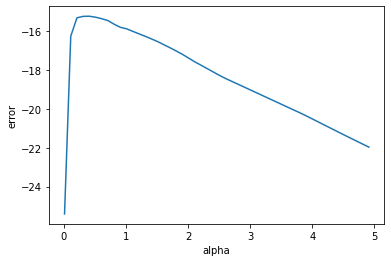

In [11]:
from sklearn.linear_model import Lasso

# Testing Lasso with different values of alpha
alpha=[]
error=[]
for i in range(1,500,10):
    alpha.append(i/100)
    lasso_reg = Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')))
plt.plot(alpha, error)
plt.xlabel("alpha")
plt.ylabel("error")

In [12]:
# Choosing alpha so that it gives the smallest error value
max_index = error.index(max(error))
optimal_alpha = alpha[max_index]

optim_lasso = Lasso(alpha=optimal_alpha)
lasso_score = np.mean(cross_val_score(lasso_reg, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(lasso_score)

optim_lasso.fit(X_train, y_train)

-21.973593352845445


Lasso(alpha=0.41)

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_jobs=-1)
rand_forest_score = np.mean(cross_val_score(rand_forest, X_train, y_train, cv=3, scoring='neg_mean_absolute_error'))
print(rand_forest_score)

-15.157814351851853


In [14]:
# Tune the Random Forest model with GridsearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ('mse', 'mae'), 'n_estimators':range(10,300,10), 'max_features': ('auto', 'sqrt', 'log2')}

CV_rf = GridSearchCV(rand_forest, parameters, scoring='neg_mean_absolute_error', cv= 5)
CV_rf.fit(X_train, y_train)
print(CV_rf.best_score_)
print(CV_rf.best_estimator_)

-14.76414470899471
RandomForestRegressor(n_estimators=50, n_jobs=-1)


### Testing

In [15]:
y_pred_mult_reg = mult_reg.predict(X_test)
y_pred_lasso = optim_lasso.predict(X_test)
y_pred_rf = CV_rf.best_estimator_.predict(X_test)

test_score_mult_reg = mean_absolute_error(y_test, y_pred_mult_reg)
print('Testing score with multiple linear regression model: ',test_score_mult_reg)

test_score_lasso = mean_absolute_error(y_test, y_pred_lasso)
print('Testing score with lasso model: ',test_score_lasso)

test_score_rf = mean_absolute_error(y_test, y_pred_rf)
print('Testing score with Random Forest model: ',test_score_rf)

Testing score with multiple linear regression model:  22.87430111982231
Testing score with lasso model:  16.700535276016094
Testing score with Random Forest model:  15.917907407407407


### Pickle the model

Pickling converts the model into an object which can be stored, transferred, and converted back to the original model at a later time.

In [16]:
import pickle

pickl = {'model': CV_rf.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [18]:
# Testing the model

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

print(list(X_test.iloc[5,:]))
y_predict = model.predict(np.array(list(X_test.iloc[5,:])).reshape(1,-1))[0]
print ('The predicted salary: ', y_predict)

[3.7, 0.0, 92.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
The predicted salary:  123.20666666666666
